### Load data set with features

In [1]:
from create_df import read_df
df, dfc, all_homes, appliance_min, national_average = read_df()

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 20 days


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
run all_functions.py

In [4]:
run features.py

In [5]:
import json

#### First round of CV, finding optimal features maximising median accuracy

In [7]:
out_median, optimal_dict_median = find_optimal_features(df, dfc, all_homes, appliance_min, national_average, 
                                                        ["hvac","light","fridge","dr","wm","dw"], {"All":feature_map["All"]},
                          NUM_NEIGHBOURS_MAX=7, F_length_max=7, metric="median",
                          train_outlier=True, test_outlier=False, outlier_features=None, outlier_fraction=0.1,
                     print_steps=True)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
hvac
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
All
********************
include: aggregate_5 -> feature_subset: ['aggregate_5']. Accuracy: 81.5093101239
include: seasonal_energy_5 -> feature_subset: ['aggregate_5', 'seasonal_energy_5']. Accuracy: 84.0200083767
include: gt_1000 -> feature_subset: ['aggregate_5', 'seasonal_energy_5', 'gt_1000']. Accuracy: 86.4613257867
include: seasonal_energy_8 -> feature_subset: ['aggregate_5', 'seasonal_energy_5', 'gt_1000', 'seasonal_energy_8']. Accuracy: 86.786292743
include: aggregate_3 -> feature_subset: ['aggregate_5', 'seasonal_energy_5', 'gt_1000', 'seasonal_energy_8', 'aggregate_3']. Accuracy: 86.7656903574
include: seasonal_energy_6 -> feature_subset: ['aggregate_5', 'seasonal_energy_5', 'gt_1000', 'seasonal_energy_8', 'aggregate_3', 'seasonal_energy_6']. Accuracy: 86.7656903574
include: seasonal_energy_9 -> feature_subset: ['aggregate_5', 'seasonal_energy_5', 'gt_1000', 'seasonal_e

In [10]:
import json
json.dump(optimal_dict_median, open("optimal_dict_cv1.json","w"))
json.dump(out_median, open("out_cv1.json","w"))


### Second round of cross validation- Maximising mean accuracy after removing test outlier

In [ ]:
out_cv2 = {}
optimal_cv2 = {}
for appliance in ["fridge","hvac","dw","dr","wm","light"]:
    out_cv2[appliance] = {}
    optimal_cv2[appliance] = {}
    o, opt = find_optimal_features(df, dfc, all_homes, appliance_min, national_average, 
                                                            [appliance], {"All":feature_map["All"]},
                              NUM_NEIGHBOURS_MAX=7, F_length_max=7, metric="mean",
                              train_outlier=True, test_outlier=True, outlier_features=
                                   optimal_dict_median[appliance]["All"]["f"], outlier_fraction=0.1,
                         print_steps=True)
    out_cv2[appliance]["All"]=o
    optimal_cv2[appliance]["All"]=opt
    

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fridge
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
All
********************
include: aggregate_9 -> feature_subset: ['aggregate_9']. Accuracy: 73.5329848207

### Sensitivity analysis on varying proportion of homes in the train set

In [ ]:
for appliance in ["fridge","hvac","dw","dr","wm","light"]:
    o, opt = find_optimal_features(df, dfc, all_homes, appliance_min, national_average, 
                                                            [appliance], {"All":feature_map["All"]},
                              NUM_NEIGHBOURS_MAX=7, F_length_max=7, metric="median",
                              train_outlier=True, test_outlier=True, outlier_features=
                                   optimal_dict_median[appliance]["All"]["f"], outlier_fraction=0.1,
                         print_steps=True)

In [16]:
criterion_function(df, dfc, all_homes, appliance_min, national_average,
                       appliance="hvac", feature=optimal_dict['hvac']['All']['f'],NUM_NEIGHBOURS=4,
                       train_outlier=True, test_outlier=True, outlier_features=optimal_dict['hvac']['All']['f'], outlier_fraction=0.1,
                       metric="mean")

84.335716436338075

In [182]:
l = {}
for home in all_homes['hvac']:

    df = st['/%d' %home][['air1']]['2013-5-1':'2013-10-31'].resample("15T")
    df_day = df.resample("1D")
    df_day['month'] = df_day.index.month
    df_day['ON'] = df_day['air1']>100
    l[home] = (df_day.groupby("month").sum()>15)["ON"].sum()
    if l[home]<=4:
        print home, (df_day.groupby("month").sum()>15)["ON"]
    


624 month
5     False
6      True
7      True
8      True
9      True
10    False
Name: ON, dtype: bool
1953 month
5     False
6      True
7      True
8      True
9      True
10    False
Name: ON, dtype: bool
6636 month
5     False
6      True
7      True
8      True
9      True
10    False
Name: ON, dtype: bool
6836 month
5     False
6      True
7      True
8      True
9      True
10    False
Name: ON, dtype: bool
7769 month
5     False
6      True
7      True
8      True
9      True
10    False
Name: ON, dtype: bool
9922 month
5     False
6      True
7      True
8      True
9      True
10    False
Name: ON, dtype: bool


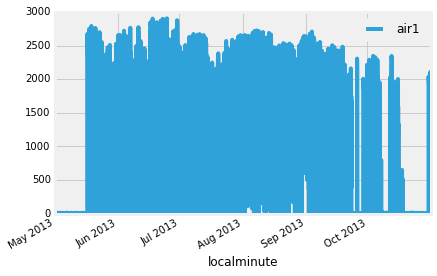

In [174]:
df.plot()

In [167]:
l_ser = pd.Series(l)

In [184]:
l_ser[l_ser<=4].index

Int64Index([624, 1953, 6636, 6836, 7769, 9922], dtype='int64')

In [208]:
accur_df.loc[9922,10]=np.NaN

In [209]:
accur_df.mean().mean()

75.130302760504165

(-0.1, 1.1)

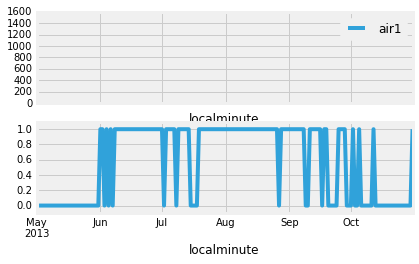

In [157]:
fig, ax = plt.subplots(nrows=2, sharex=True)
df[['air1']].plot(ax=ax[0])
df_day['ON'].plot(ax=ax[1])
ax[1].set_ylim((-0.1,1.1))



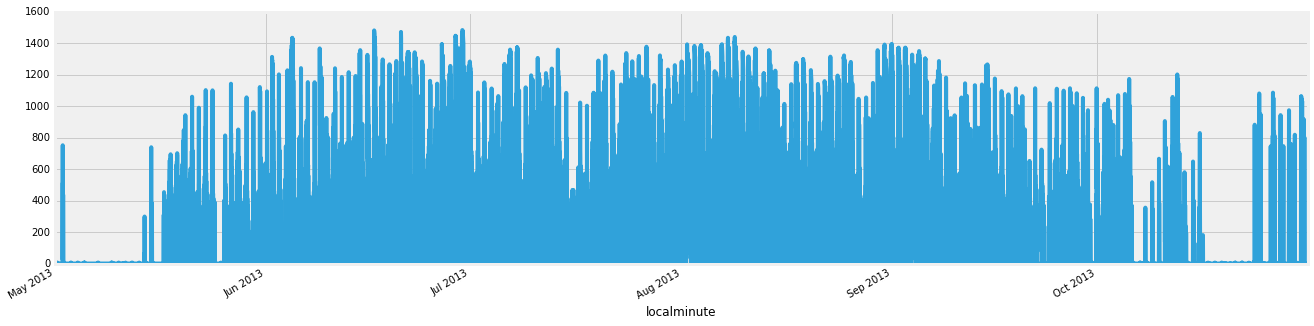

In [158]:
df['air1'].plot(figsize=(20,5))

In [95]:
accur_df.ix[9934][6]=np.NaN

In [98]:
accur_df.mean(axis=1).mean()

73.244231127354681

In [ ]:
find_optimal_features(df, dfc, all_homes, appliance_min, national_average, ["light"], {"All":feature_map["All"]},
                          NUM_NEIGHBOURS_MAX=7, F_length_max=7, metric="median",
                          train_outlier=True, test_outlier=False, outlier_features=optimal_dict['light']['All']['f'], outlier_fraction=0.1,
                     print_steps=True)

In [ ]:
find_outlier_test_homes(df,all_homes,  "light", optimal_dict['light']['All']['f'], outliers_fraction=0.1)

In [1]:
find_outlier_test_homes(df,all_homes,  "light", ['area', 'aggregate_3', 'aggregate_7'], outliers_fraction=0.1)

NameError: name 'find_outlier_test_homes' is not defined

In [ ]:
criterion_function(df, dfc, all_homes, appliance_min, national_average,
                       appliance="light", feature=f, NUM_NEIGHBOURS=3,
                       train_outlier=True, test_outlier=True, outlier_features=f, outlier_fraction=0.1,
                       metric="mean")

In [ ]:
criterion_function(df, dfc, all_homes, appliance_min, national_average,
                       appliance="light", feature=f, NUM_NEIGHBOURS=3,
                       train_outlier=True, test_outlier=True, outlier_features=f, outlier_fraction=0.1,
                       metric="median")

In [3]:
def find_precision_recall_outlier():
    out = {}
    for appliance in all_homes.keys():
        true_outliers = all_true_outliers(df, all_homes, appliance, outlier_fraction=0.1)
        pred = find_outlier_test_homes(df,all_homes, appliance, optimal_dict[appliance]['All']['f'], outliers_fraction=0.1)
        intersection = np.intersect1d(true_outliers, pred)
        precision = len(intersection)*1./len(pred)
        recall = len(intersection)*1./len(true_outliers)
        out[appliance] = {"precision":precision, "recall":recall}
    return out


In [235]:
find_optimal_features(df, dfc, all_homes, appliance_min, national_average, ["dr"], {"All":feature_map['All']},
                          NUM_NEIGHBOURS_MAX=7, F_length_max=7, metric="mean",
                          train_outlier=True, test_outlier=True, outlier_features=['fraction_8',
 'bet_500_1000',
 'fraction_11',
 'max_seasonal_12',
 'aggregate_11',
 'num_rooms',
 'max_seasonal_daily'], outlier_fraction=0.1,
                          print_steps=True)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
dr
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
All
********************


KeyError: "['fraction_8' 'bet_500_1000' 'fraction_11' 'max_seasonal_12' 'aggregate_11'\n 'num_rooms' 'max_seasonal_daily'] not in index"

In [234]:
[str(x).replace("\n","") for x in optimal_dict['dr']['All']['f']]

['fraction_8',
 'bet_500_1000',
 'fraction_11',
 'max_seasonal_12',
 'aggregate_11',
 'num_rooms',
 'max_seasonal_daily']

In [246]:
find_optimal_features(df, dfc, all_homes, appliance_min, national_average, ["light","dw"], {"All":feature_map["All"]},
                          NUM_NEIGHBOURS_MAX=7, F_length_max=7, metric="median",
                          train_outlier=True, test_outlier=False, outlier_features=[u'gt_1000',
  u'fft_3',
  u'fraction_8',
  u'lt_500',
  u'seasonal_energy_10',
  u'fraction_16'], outlier_fraction=0.1,
                          print_steps=True)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
light
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
All
********************
include: bet_500_1000 -> feature_subset: ['bet_500_1000']. Accuracy: 47.4764389822
include: autocorr -> feature_subset: ['bet_500_1000', 'autocorr']. Accuracy: 47.471735883
include: ratio_min_max -> feature_subset: ['bet_500_1000', 'autocorr', 'ratio_min_max']. Accuracy: 43.1353158143
include: cluster_big -> feature_subset: ['bet_500_1000', 'autocorr', 'ratio_min_max', 'cluster_big']. Accuracy: 44.3530534463
include: aggregate_2 -> feature_subset: ['bet_500_1000', 'autocorr', 'ratio_min_max', 'cluster_big', 'aggregate_2']. Accuracy: 47.9414011308
include: ratio_difference_min_max -> feature_subset: ['bet_500_1000', 'autocorr', 'ratio_min_max', 'cluster_big', 'aggregate_2', 'ratio_difference_min_max']. Accuracy: 51.5270836852
include: fft_2 -> feature_subset: ['bet_500_1000', 'autocorr', 'ratio_min_max', 'cluster_big', 'aggregate_2', 'ratio_difference_min

({'dw': {'All': {1: {'accuracy': 49.08360053355657,
     'f': ['aggregate_6',
      'temperature_corr',
      'fft_2',
      'total_occupants',
      'aggregate_10',
      'aggregate_1',
      'fft_4']},
    2: {'accuracy': 54.545307916951202,
     'f': ['temperature_corr',
      'fft_2',
      'fft_1',
      'aggregate_9',
      'aggregate_5',
      'difference_min_max']},
    3: {'accuracy': 48.381917121314224,
     'f': ['aggregate_8', 'aggregate_6', 'temperature_corr', 'aggregate_1']},
    4: {'accuracy': 46.25473920631466, 'f': ['aggregate_12', 'aggregate_1']},
    5: {'accuracy': 46.013588513502761, 'f': ['aggregate_10']},
    6: {'accuracy': 48.456961094497039,
     'f': ['aggregate_6',
      'cluster_small',
      'difference_min_max',
      'aggregate_3']}}},
  'light': {'All': {1: {'accuracy': 52.118994550225388,
     'f': ['bet_500_1000',
      'autocorr',
      'ratio_min_max',
      'cluster_big',
      'aggregate_2',
      'ratio_difference_min_max',
      'fft_2']},
    

In [ ]:
f = ['temperature_corr',
     'fft_2',
     'fft_1',
     'aggregate_9',
     'aggregate_5',
     'difference_min_max']

In [247]:
  f=  ['area',
     'aggregate_3',
     'aggregate_7',
     'lt_500',
     'bet_500_1000',
     'aggregate_5']

In [249]:
find_optimal_features(df, dfc, all_homes, appliance_min, national_average, ["light"], {"All":feature_map["All"]},
                          NUM_NEIGHBOURS_MAX=7, F_length_max=7, metric="mean",
                          train_outlier=True, test_outlier=True, outlier_features=f, outlier_fraction=0.1,
                          print_steps=True)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
light
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
All
********************
include: bet_500_1000 -> feature_subset: ['bet_500_1000']. Accuracy: 41.6764063549
include: lt_500 -> feature_subset: ['bet_500_1000', 'lt_500']. Accuracy: 42.5612872267
include: gt_1000 -> feature_subset: ['bet_500_1000', 'lt_500', 'gt_1000']. Accuracy: 40.4497080584
include: aggregate_9 -> feature_subset: ['bet_500_1000', 'lt_500', 'gt_1000', 'aggregate_9']. Accuracy: 40.3836220304
include: max_seasonal_weekly -> feature_subset: ['bet_500_1000', 'lt_500', 'gt_1000', 'aggregate_9', 'max_seasonal_weekly']. Accuracy: 40.2489284632
include: aggregate_8 -> feature_subset: ['bet_500_1000', 'lt_500', 'gt_1000', 'aggregate_9', 'max_seasonal_weekly', 'aggregate_8']. Accuracy: 43.4506844008
include: aggregate_5 -> feature_subset: ['bet_500_1000', 'lt_500', 'gt_1000', 'aggregate_9', 'max_seasonal_weekly', 'aggregate_8', 'aggregate_5']. Accuracy: 43.7406119555
inc

({'light': {'All': {1: {'accuracy': 43.740611955463265,
     'f': ['bet_500_1000',
      'lt_500',
      'gt_1000',
      'aggregate_9',
      'max_seasonal_weekly',
      'aggregate_8',
      'aggregate_5']},
    2: {'accuracy': 49.357384785663463, 'f': ['area', 'aggregate_7']},
    3: {'accuracy': 46.729372041290013,
     'f': ['area', 'aggregate_4', 'aggregate_11', 'gt_1000', 'lt_500']},
    4: {'accuracy': 47.517537185516822,
     'f': ['bet_500_1000', 'aggregate_1', 'area', 'lt_500']},
    5: {'accuracy': 47.267245724579425,
     'f': ['area',
      'bet_500_1000',
      'aggregate_10',
      'aggregate_6',
      'lt_500',
      'aggregate_5']},
    6: {'accuracy': 46.992435709214028,
     'f': ['area', 'bet_500_1000', 'aggregate_5']}}}},
 {'light': {'All': {'accuracy': 49.357384785663463,
    'f': ['area', 'aggregate_7'],
    'k': 2}}})

In [251]:
f = ['aggregate_11', 'aggregate_10', 'area', 'aggregate_3']
find_optimal_features(df, dfc, all_homes, appliance_min, national_average, ["wm"], {"All":feature_map["All"]},
                          NUM_NEIGHBOURS_MAX=7, F_length_max=7, metric="mean",
                          train_outlier=True, test_outlier=True, outlier_features=f, outlier_fraction=0.1,
                          print_steps=True)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
wm
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
All
********************
include: aggregate_11 -> feature_subset: ['aggregate_11']. Accuracy: 62.243938091
include: aggregate_10 -> feature_subset: ['aggregate_11', 'aggregate_10']. Accuracy: 63.2406997486
include: aggregate_2 -> feature_subset: ['aggregate_11', 'aggregate_10', 'aggregate_2']. Accuracy: 63.8675085828
include: aggregate_1 -> feature_subset: ['aggregate_11', 'aggregate_10', 'aggregate_2', 'aggregate_1']. Accuracy: 63.5709843968
include: area -> feature_subset: ['aggregate_11', 'aggregate_10', 'aggregate_2', 'aggregate_1', 'area']. Accuracy: 63.3386403869
include: aggregate_3 -> feature_subset: ['aggregate_11', 'aggregate_10', 'aggregate_2', 'aggregate_1', 'area', 'aggregate_3']. Accuracy: 64.5409072898
include: lt_500 -> feature_subset: ['aggregate_11', 'aggregate_10', 'aggregate_2', 'aggregate_1', 'area', 'aggregate_3', 'lt_500']. Accuracy: 64.5409072898
include: cl

KeyboardInterrupt: 

In [254]:
f = ['aggregate_11', 'aggregate_10', 'area', 'aggregate_3']
find_optimal_features(df, dfc, all_homes, appliance_min, national_average, ["wm"], {"All":feature_map["All"]},
                          NUM_NEIGHBOURS_MAX=7, F_length_max=7, metric="mean",
                          train_outlier=True, test_outlier=True, outlier_features=f, outlier_fraction=0.1,
                          print_steps=True)

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/scipy/stats/mstats_basic.py:1670: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  np.min(n))
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/scipy/stats/mstats_basic.py:1670: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  np.min(n))


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
wm
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
********************
All
********************
include: aggregate_11 -> feature_subset: ['aggregate_11']. Accuracy: 61.5119102464
include: bet_500_1000 -> feature_subset: ['aggregate_11', 'bet_500_1000']. Accuracy: 62.8029706922
include: aggregate_3 -> feature_subset: ['aggregate_11', 'bet_500_1000', 'aggregate_3']. Accuracy: 62.7851662025
include: gt_1000 -> feature_subset: ['aggregate_11', 'bet_500_1000', 'aggregate_3', 'gt_1000']. Accuracy: 63.3069423954
include: aggregate_2 -> feature_subset: ['aggregate_11', 'bet_500_1000', 'aggregate_3', 'gt_1000', 'aggregate_2']. Accuracy: 63.1667473159
include: area -> feature_subset: ['aggregate_11', 'bet_500_1000', 'aggregate_3', 'gt_1000', 'aggregate_2', 'area']. Accuracy: 62.770890025
include: aggregate_1 -> feature_subset: ['aggregate_11', 'bet_500_1000', 'aggregate_3', 'gt_1000', 'aggregate_2', 'area', 'aggregate_1']. Accuracy: 62.9886243707
include: aggre

({'wm': {'All': {1: {'accuracy': 63.306942395355627,
     'f': ['aggregate_11', 'bet_500_1000', 'aggregate_3', 'gt_1000']},
    2: {'accuracy': 63.508151338026032,
     'f': ['aggregate_11',
      'bet_500_1000',
      'aggregate_10',
      'seasonal_energy_6',
      'aggregate_5',
      'aggregate_7',
      'aggregate_4']},
    3: {'accuracy': 63.065128121300177,
     'f': ['cluster_big',
      'area',
      'max_trend_daily',
      'aggregate_4',
      'bet_500_1000',
      'gt_1000',
      'aggregate_2']},
    4: {'accuracy': 60.894473663311032,
     'f': ['aggregate_7', 'area', 'aggregate_4']},
    5: {'accuracy': 60.187099391806832,
     'f': ['area',
      'difference_min_max',
      'bet_500_1000',
      'ratio_min_max',
      'fft_1',
      'fft_5',
      'max_seasonal_12']},
    6: {'accuracy': 59.559399497127401,
     'f': ['area',
      'fft_1',
      'aggregate_10',
      'autocorr',
      'bet_500_1000',
      'gt_1000',
      'total_occupants']}}}},
 {'wm': {'All': {'accu

In [294]:
all_true_outliers(df, all_homes, 'wm', .1)

array([  545.,  9654.])

In [295]:
find_outlier_test_homes(df,all_homes,  appliance, optimal_dict['wm']['All']['f'], outliers_fraction=0.1)

[2242, 5357, 9922, 9934]

In [287]:
pd.DataFrame(find_precision_recall_outlier(df, all_homes, optimal_dict))

hvac
0.5 0.5
light
0.5 0.5
wm
0.0 0.0
fridge
0.0 0.0
dw
0.333333333333 0.5
dr
0.0 0.0


dr        dw  fridge  hvac  light  wm
precision   0  0.333333       0   0.5    0.5   0
recall      0  0.500000       0   0.5    0.5   0

In [261]:
all_homes

{'dr': Int64Index([  94,  370,  410,  624, 1283, 2156, 2242, 2814, 3367, 3456, 3482,
             3723, 3967, 4732, 4767, 5746, 5785, 5814, 6072, 6636, 6836, 7016,
             7731, 7769, 7866, 8317, 9052, 9654, 9922, 9933, 9934, 9982],
            dtype='int64'),
 'dw': array([  26,   94,  370,  545,  624, 1334, 1642, 2156, 2242, 2814, 3367,
        3456, 3482, 3723, 3967, 4767, 5357, 5746, 6072, 6636, 6836, 6910,
        7769, 9922, 9934, 9982]),
 'fridge': array([  94,  370,  410,  545,  624, 1953, 2156, 2242, 2814, 3367, 3456,
        3723, 3967, 4767, 5357, 5371, 6072, 6636, 6910, 7769, 7866]),
 'hvac': array([  26,  370,  410,  545,  624, 1283, 1642, 1953, 2129, 2156, 2242,
        2814, 3367, 3456, 3723, 3967, 4767, 5357, 5371, 5746, 5785, 5814,
        6072, 6636, 6836, 6910, 7731, 7769, 7866, 9654, 9922, 9933, 9934]),
 'light': [624,
  1334,
  2470,
  3367,
  3456,
  3723,
  5814,
  6072,
  6910,
  7769,
  7866,
  9609,
  9654,
  9922],
 'wm': array([  94,  370,  545,  624, 2